# Proyek Analisis Data: Nama dataset
- Nama: Rizky Wahyudi
- Email: rizkywhyd10@gmail.com
- Id Dicoding:rizkywhyd10

## Menentukan Pertanyaan Bisnis

- Negara mana yang memiliki customer terbanyak?
- Kota mana yang memiliki customer terbanyak?
- Berapa jumlah customer baru (new) dan customer lama/pelanggan (existing)
- Negara mana yang memiliki jumlah order terbanyak?
- Kota mana yang memiliki jumlah order terbanyak?
- Kategori produk apa yang paling banyak terjual?
- Kategori produk apa yang menyumbang pemasukan tertinggi?
- Kategori produk apa yang paling banyak dibeli oleh customer lama/pelanggan (existing)?
- Customer mana yang menyumbang jumlah pemasukan tertinggi?
- Bagaimana tren jumlah order setiap bulan?
- Bagaimana tren jumlah pemasukan setiap bulan?
- Apa saja 5 produk kategori yang memiliki penjualan tertinggi dan terendah?
- Bagaimana proporsi value dari masing-masing customer dari yang terendah hingga tertinggi?

## Menyaipkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
!pip install streamlit babel
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [5]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

setelah melihat ke-empat dataset tersebut, terlihat beberapa kolom dalam tiap dataset yang mungkin tidak digunakan, oleh karena itu, kita akan menghapus beberapa kolom-kolom yang tidak digunakan**
*   dataset customers: hapus kolom customers_zip_code
*   dataset orders_item: hapus kolom shipping_limit_date dan freight_value
*   dataset orders: hapus kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
*   dataset product: hapus kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm

In [9]:
customers_df = customers_df.drop(columns=['customer_zip_code_prefix'])
customers_df

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS


In [10]:
order_items_df = order_items_df.drop(['shipping_limit_date','freight_value'], axis=1)
order_items_df

,order_id,order_item_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99


In [11]:
orders_df = orders_df.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


In [12]:
products_df = products_df.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=1)
products_df

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


### Cleaning Data

Data Wrangling (Cleaning Data) - Dataset customers

In [13]:
#mengecek missing value pada dataset customers
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [14]:
#karena tidak terdapat missing value pada dataset customers, selanjutnya mengecek duplikasi data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
#tidak terdapat duplikasi data pada dataset customers, selanjutnya melihat inacurate value atau deskripsi sebaran data
customers_df.describe(include = 'all')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


Data Wrangling (Cleaning Data) - Dataset order_items

In [16]:
#mengecek missing value pada dataset order_items
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


In [17]:
#karena tidak terdapat missing value pada dataset order_items, selanjutnya mengecek duplikasi data
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
#tidak terdapat duplikasi data pada dataset order_items, selanjutnya melihat inacurate value atau deskripsi sebaran data
order_items_df.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [19]:
#dari sebaran data tersebut sebenarnya ada sedikit kerancuan antara nilai rata-rata yang memiliki gap yang cukup jauh dengan nilai maksimum,
#tetapi karena untuk menjaga realitas dan orisinalitas data, hal ini dapat dimaklumi untuk mendapatkan hasil yang sebenar benarnya

Data Wrangling (Cleaning Data) - Dataset orders

In [20]:
#mengecek missing value pada dataset orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [21]:
#mengubah format tanggal pada order_purchase_timestamp menjadi hanya tanggal, bulan, dan tahun
orders_df['order_purchase'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.date
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13


In [22]:
#menghapus kolom orders_purchase_timestamp yang telah dirubah formatnya pada order_purchase
orders_df = orders_df.drop(columns=['order_purchase_timestamp'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


In [23]:
#mengubah tipe data order_purchase menjadi format waktu
orders_df['order_purchase'] = pd.to_datetime(orders_df['order_purchase'])

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        99441 non-null  object        
 1   customer_id     99441 non-null  object        
 2   order_status    99441 non-null  object        
 3   order_purchase  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


In [25]:
#karena tidak terdapat missing value pada dataset orders, selanjutnya mengecek duplikasi data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
#tidak terdapat duplikasi data pada dataset orders, selanjutnya melihat inacurate value atau deskripsi sebaran data
orders_df.describe()

<ipython-input-26-e49c82f19ce7>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe()


,order_id,customer_id,order_status,order_purchase
count,99441,99441,99441,99441
unique,99441,99441,8,634
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-24 00:00:00
freq,1,1,96478,1176
first,NaN,NaN,NaN,2016-09-04 00:00:00
last,NaN,NaN,NaN,2018-10-17 00:00:00


Data Wrangling (Cleaning Data) - Dataset products

In [27]:
#mengecek missing value pada dataset products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [28]:
#karena tidak terdapat missing value pada dataset products, selanjutnya mengecek duplikasi data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
#tidak terdapat duplikasi data pada dataset products, selanjutnya melihat inacurate value atau deskripsi sebaran data
products_df.describe()

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


## Exploratory Data Analysis (EDA)

### Explore ...

1. Menemukan negara dengan customer terbanyak

In [33]:
#Negara dengan customers terbanyak
customers_df.groupby(by="customer_state").customer_unique_id.count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_unique_id, dtype: int64

2. Menemukan kota dengan customer terbanyak

In [35]:
#Kota dengan customers terbanyak
customers_df.groupby(by="customer_city").customer_unique_id.count().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

3. Menemukan proporsi customer yang merupakan pelanggan (existing) dan baru (new)

In [36]:
#mengkategorikan customers menjadi customers yang baru (New) dan yang pelanggan (existing)
customers_df=customers_df.assign(Status=np.where(~customers_df['customer_unique_id'].duplicated(),'New','Existing'))
customers_df.head()

,customer_id,customer_unique_id,customer_city,customer_state,Status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,New


In [37]:
customers_df.describe()

,customer_id,customer_unique_id,customer_city,customer_state,Status
count,99441,99441,99441,99441,99441
unique,99441,96096,4119,27,2
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP,New
freq,1,17,15540,41746,96096


In [38]:
#melihat jumlah customer yang baru dan existing
customers_df.groupby(by="Status").customer_unique_id.nunique()

Status
Existing     2997
New         96096
Name: customer_unique_id, dtype: int64

4. Menemukan negara dengan jumlah order terbanyak

In [39]:
#menggabungkan tabel dataset orders dengan customers
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase,customer_unique_id,customer_city,customer_state,Status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,New
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,af07308b275d755c9edb36a90c618231,barreiras,BA,New
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,New
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,New
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,New


In [40]:
#melihat jumlah order berdasarkan state/negara
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

5. Menemukan kota dengan jumlah order terbanyak

In [41]:
#melihat jumlah order berdasarkan city
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: order_id, Length: 4119, dtype: int64

6. Menemukan kategori produk yang paling banyak terjual

In [42]:
#menggabungkan tabel dataset order_items dengan products
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)

#mengecek kategori produk yang paling banyak terjual
order_items_products_df.groupby(by="product_category_name").order_id.count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: order_id, Length: 73, dtype: int64

7. Menemukan kategori produk yang memiliki total jumlah penjualan tertinggi (revenue)

In [43]:
#Mengecek kategori produk yang paling banyak memberikan pemasukan total
order_items_products_df.groupby(by="product_category_name").agg({
    "order_id": "count",
    "price": "sum",
}).sort_values(by="price", ascending=False)

,order_id,price
product_category_name,,
beleza_saude,9670,1258681.34
relogios_presentes,5991,1205005.68
cama_mesa_banho,11115,1036988.68
esporte_lazer,8641,988048.97
informatica_acessorios,7827,911954.32
...,...,...
flores,33,1110.04
casa_conforto_2,30,760.27
cds_dvds_musicais,14,730.00


8. Menemukan kategori produk yang paling banyak dibeli oleh pelanggan existing (repeat order)

In [45]:
#menggabungkan keseluruhan data untuk eksplorasi lebih luas
all_df = pd.merge(
    left=orders_customers_df,
    right=order_items_products_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)

#melihat data customer yang merupakan pelanggan (existing)
existing_customers_df=all_df[all_df['Status']=='Existing']
existing_customers_df.head()

,order_id,customer_id,order_status,order_purchase,customer_unique_id,customer_city,customer_state,Status,order_item_id,product_id,seller_id,price,product_category_name
17,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02,6e26bbeaa107ec34112c64e1ee31c0f5,rio de janeiro,RJ,Existing,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,1299.00,construcao_ferramentas_construcao
62,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13,51838d41add414a0b1b989b7d251d9ee,campinas,SP,Existing,1.0,ebd7c847c1e1cb69ec374ae0ebee1f4c,391fc6631aebcf3004804e51b40bcf1e,84.90,moveis_decoracao
94,b8801cccd8068de30112e4f49903d74a,f26a435864aebedff7f7c84f82ee229f,delivered,2017-07-30,bb4d84a2b45b22ed710ac8c0dec63d1a,poa,SP,Existing,1.0,154e7e31ebfa092203795c972e5804a6,cc419e0650a3c5ba77189a1882b7556a,19.99,beleza_saude
95,2711a938db643b3f0b62ee2c8a2784aa,29cb486c739f9774c8eb542e07b56cd2,delivered,2017-12-22,2ae3c67452283d5a0d30b32e0d33296e,brasilia,DF,Existing,1.0,ad1128daf194f4b6ac4256e16233497c,1ca7077d890b907f89be8c954a02686a,45.00,telefonia
97,10c320f977c6a18f91b2d14be13128c6,b673f0597cb0c4d12778f731045f361a,delivered,2017-05-09,04e495a3f45df8b41be2e934bbc16961,gravatai,RS,Existing,1.0,b3be1f83cef05668c25e134852d44545,3b15288545f8928d3e65a8f949a28291,110.99,cama_mesa_banho


In [46]:
#melihat kategori produk yang paling banyak dibeli dari pelanggan existing
existing_customers_df.groupby(by="product_category_name").agg({
    "order_id": "count",
    "price": "sum",
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_category_name,,
cama_mesa_banho,602,53529.64
moveis_decoracao,474,38535.55
esporte_lazer,369,42896.14
beleza_saude,291,30718.35
informatica_acessorios,286,33906.68
...,...,...
fashion_esporte,1,24.99
artigos_de_festas,1,21.90
la_cuisine,1,105.00


9. Menemukan customer dengan total pembelian tertinggi

In [47]:
#melihat customers dengan total pembelian(revenue) terbanyak
all_df.groupby(by="customer_unique_id").price.sum().sort_values(ascending=False)

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13440.0
da122df9eeddfedc1dc1f5349a1a690c     7388.0
763c8b1c9c68a0229c42c9fc6f662b93     7160.0
dc4802a71eae9be1dd28f5d788ceb526     6735.0
459bef486812aa25204be022145caa62     6729.0
                                     ...   
48aa83248476ac4d2b058596436b7680        0.0
dc0eb6b79e438bca1400a408ff88fd15        0.0
33e79e15e9937ba1bc8f61eedae9e7f0        0.0
cdc8a55939d542adcdcf766ce064a40a        0.0
859801343e938e403027c0668f64f037        0.0
Name: price, Length: 96096, dtype: float64

10. Menemukan tren jumlah order terbanyak dalam setiap bulan

In [48]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df

,order_purchase,order_count,revenue
0,2016-09,4,267.36
1,2016-10,324,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,800,120312.87
5,2017-02,1780,247303.02
6,2017-03,2682,374344.30
7,2017-04,2404,359927.23
8,2017-05,3700,506071.14
9,2017-06,3245,433038.60


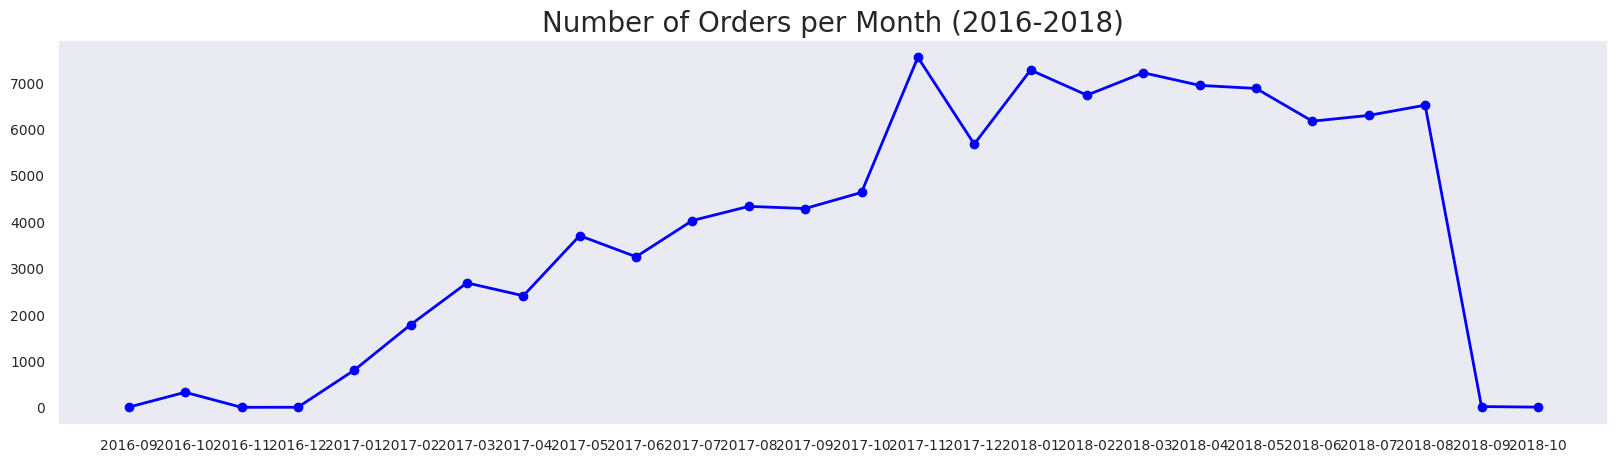

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_orders_df["order_purchase"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="blue")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

11. Menemukan tren total order (revenue) terbanyak dalam setiap bulan

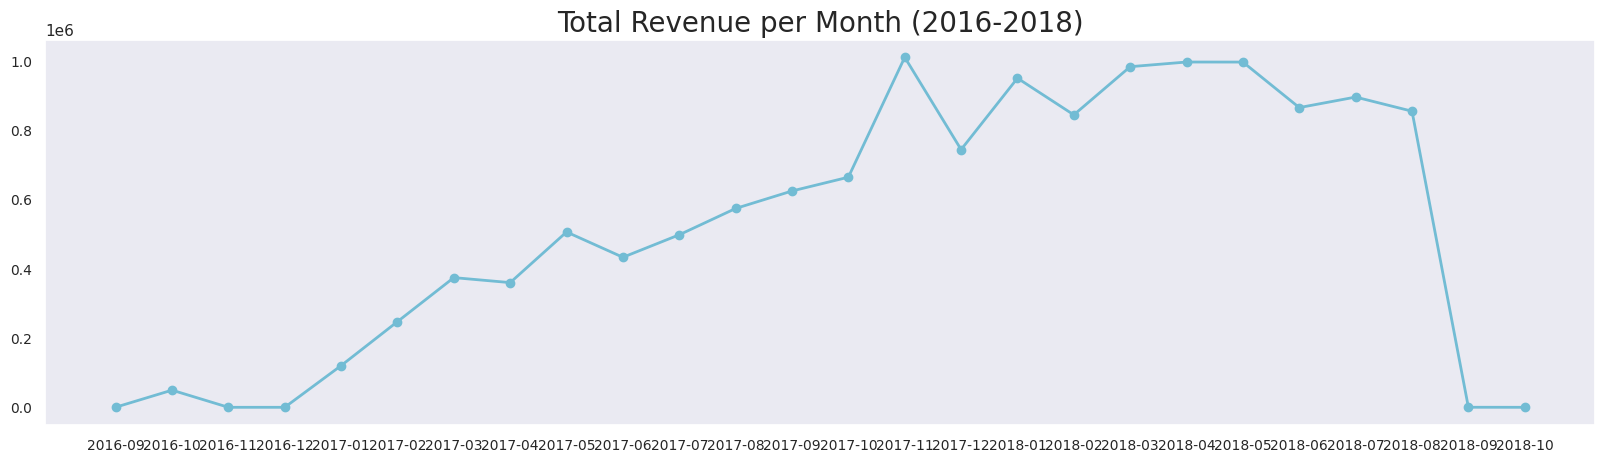

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(
    monthly_orders_df["order_purchase"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk yang menjadi 5 kategori produk dengan jumlah penjualan tertinggi dan terendah?

In [55]:
sum_order_product_category_df = all_df.groupby("product_category_name").order_id.count().sort_values(ascending=False).reset_index()
sum_order_product_category_df.head()

,product_category_name,order_id
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827


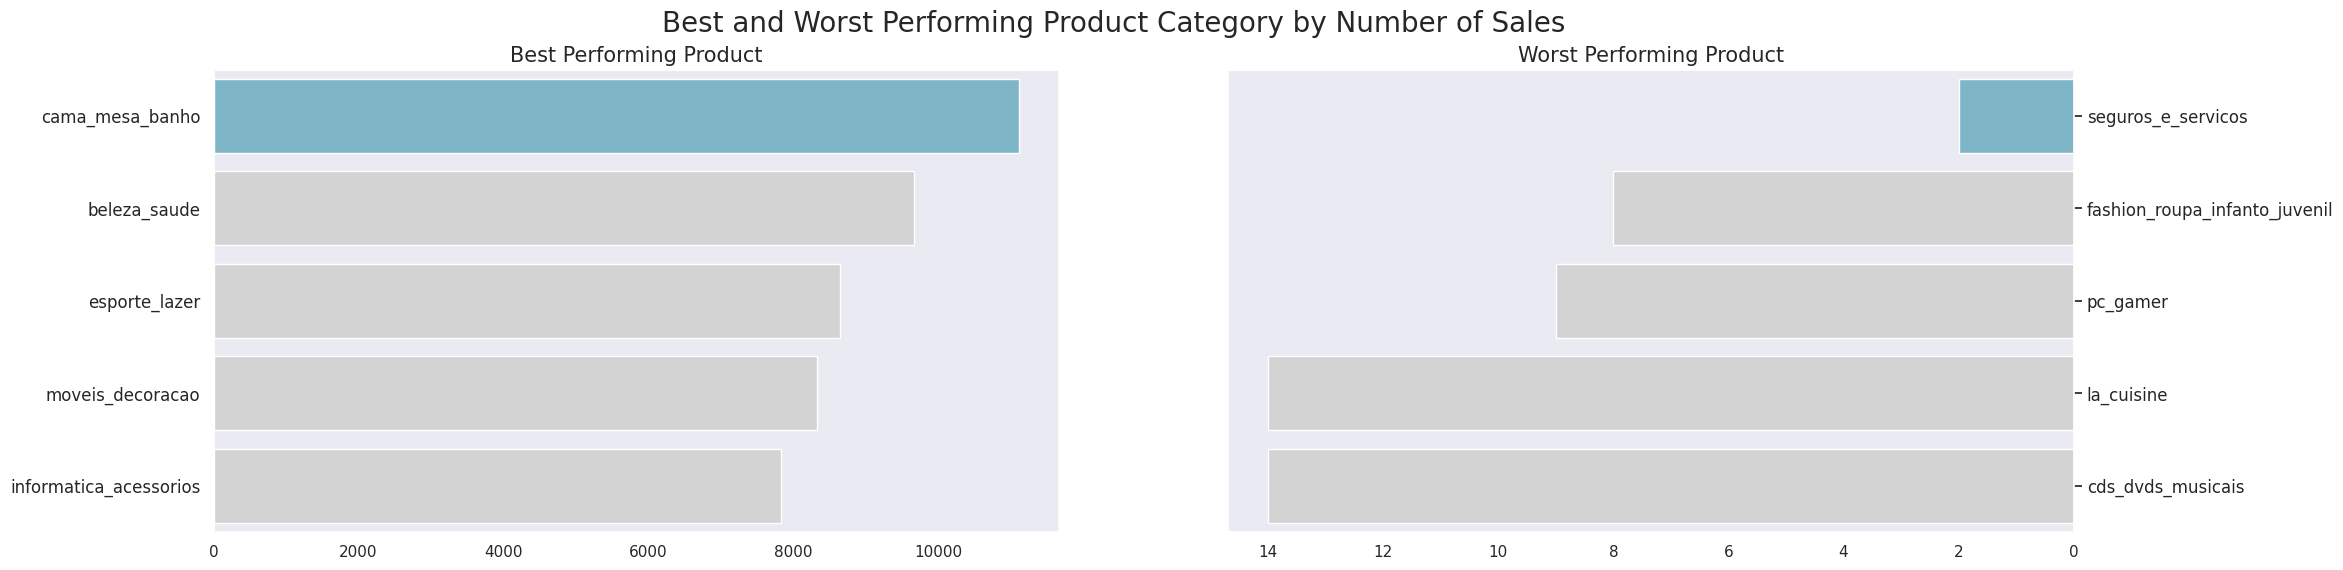

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_product_category_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_product_category_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2: Negara mana yang mempunya customer terbanyak?



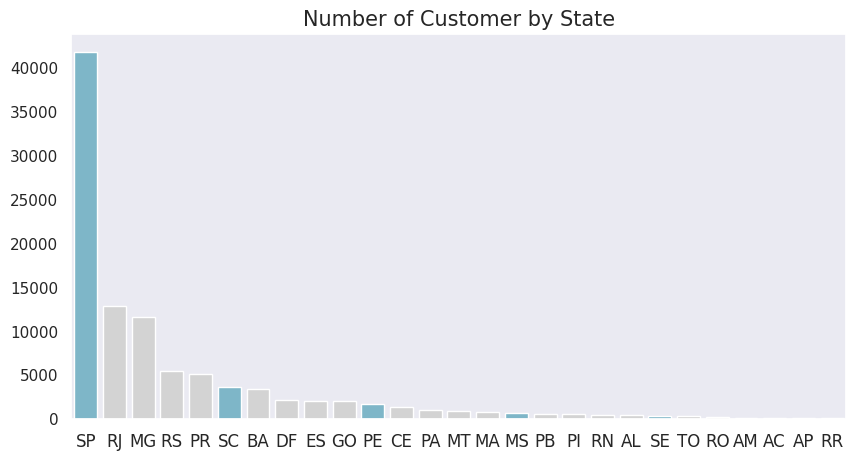

In [57]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana perbandingan antara jumlah customer baru (new) dan customer lama/pelanggan (existing)?

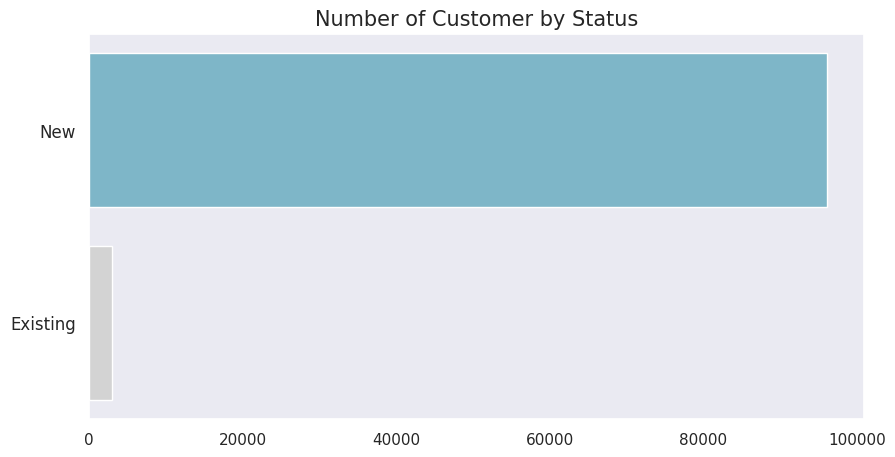

In [58]:
bystatus_df = all_df.groupby(by="Status").customer_unique_id.nunique().reset_index()
bystatus_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bystatus_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="Status",
    data=bystatus_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Status", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4 : Bagaimana proporsi dari segmentasi masing-masing tipe customer dari yang tertinggi hingga terendah berdasarkan parameter order terakhir, jumlah order, dan total order (revenue)?

In [59]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


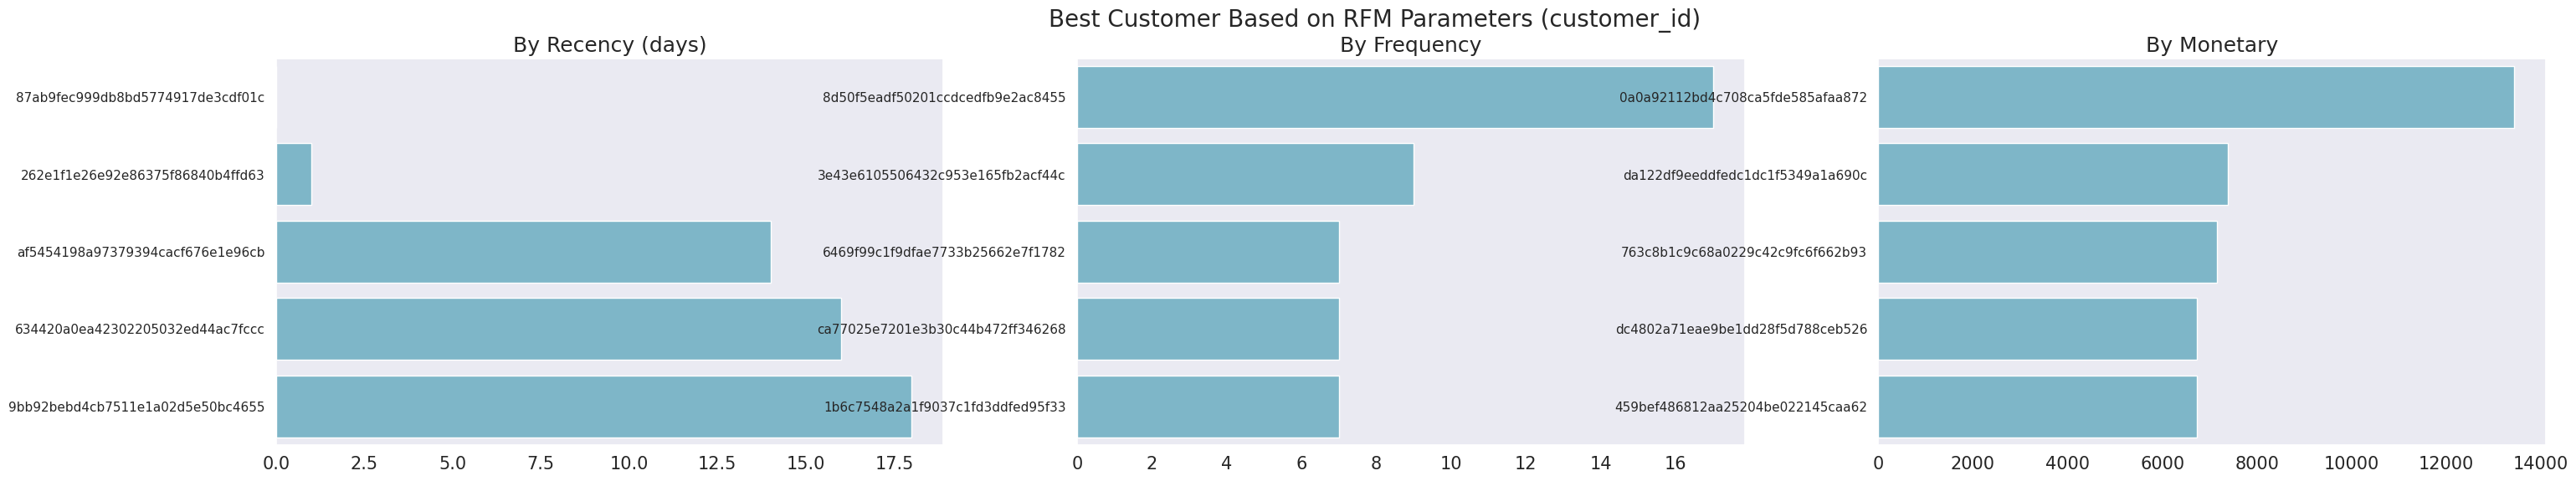

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="customer_id", x="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5), orient="h", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), orient="h", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), orient="h", palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [61]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,73287.0,46550.0,65126.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,72302.5,46550.0,4851.5
2,0000f46a3911fa3c0805444483337064,1,69.00,586,3519.0,46550.0,38351.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,27794.0,46550.0,10260.0
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,32644.0,46550.0,77381.0


In [62]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160,76.264361,48.441142,67.771812
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163,75.239864,48.441142,5.048597
2,0000f46a3911fa3c0805444483337064,1,69.00,586,3.661963,48.441142,39.909049
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370,28.923160,48.441142,10.676823
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337,33.970196,48.441142,80.524684


In [63]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.39
2,0000f46a3911fa3c0805444483337064,1.84
3,0000f6ccb0745a6a4b88665a16c9f078,1.20
4,0004aac84e0df4da2b147fca70cf8255,3.23
5,0004bd2a26a76fe21f786e4fbd80607f,3.32
6,00050ab1314c0e55a6ca13cf7181fecf,1.55


In [64]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)


,customer_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.18,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.39,lost customers
2,0000f46a3911fa3c0805444483337064,1.84,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.20,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.23,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.32,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.55,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.80,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.68,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.80,Low value customers


In [65]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,2597
1,Low value customers,46340
2,Medium value customer,28255
3,Top customers,505
4,lost customers,18399


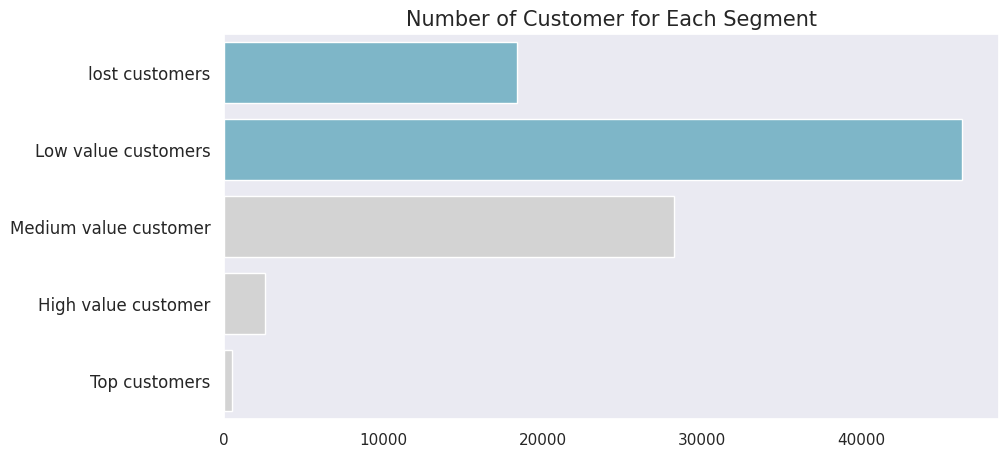

In [66]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [67]:
#menyimpan keseluruhan data
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Negarayang memiliki customer terbanyak adalah negara dengan kode SP, RG, dan MJ;
- Kota yang memiliki customer terbanyak adalah sao paulo, rio de janeiro, dan belo horizonte;
- Proporsi antara customer baru (new) dan customer lama/pelanggan (existing) sangat jauh dimana customer lama masing sangat sedikit dengan jumlah 2997 dibanding customer lama yang berjumlah 96096;
- Negara yang memiliki jumlah order terbanyak adalah negara dengan kode SP, RG, dan MJ;
- Kota yang memiliki jumlah order terbanyak adalah sao paulo, rio de janeiro, dan belo horizonte;
- Kategori produk yang paling banyak terjual adalah cama_mesa_banho, beleza_saude, dan esporte_lazer;
- Kategori produk yang menyumbang pemasukan tertinggi/revenue tertinggi adalah beleza_saude, relogios_presentes, dan cama_mesa_banho;
- Kategori produk yang paling banyak dibeli oleh customer lama/pelanggan (existing) adalah cama_mesa_banho, moveis_decoracao, dan esporte_lazer;
- Customer yang menyumbang jumlah pemasukan tertinggi adalah customer dengan id 0a0a92112bd4c708ca5fde585afaa872;
- Tren jumlah order setiap bulan cenderung naik hingga akhir tahun 2017, lalu fluktuatif stagnan hingga bulan 7 tahun 2018, dan akhirnya turun jatuh pada bulan 8 tahun 2018;
- Bagaimana tren jumlah pemasukan/revenue juga memiliki kemiripan dengan jumlah order yaitu cenderung naik hingga akhir tahun 2017, lalu fluktuatif stagnan hingga bulan 7 tahun 2018, dan akhirnya turun jatuh pada bulan 8 tahun 2018;
- 5 produk kategori yang memiliki penjualan tertinggi adalah cama_mesa_banho, moveis_decoracao, esporte_lazer, beleza_saude, dan informatica_acessorios. Sedangkan 5 produk kategori yang memiliki penjualan terendah adalah fashion_esporte, artigos_de_festas, la_cuisine, casa_conforto_2, dan fashion_roupa_feminina;
- Proporsi value dari masing-masing customer didominasi oleh low value customers dan lost customers karena semua customers disini didominasi oleh customer baru, sedangkan proporsi medium value customers cenderung sedikit dan semakin berkurang proporsinya hingga ke top customers

In [68]:
! pip install streamlit -q

In [69]:
!wget -q -O - ipv4.icanhazip.com

34.125.83.165


In [70]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.83.165:8501

npx: installed 22 in 4.424s
your url is: https://plain-rats-love.loca.lt
  Stopping...
^C
